# Houses' prices predictions
by/Omar Abdelaleem

# Getting and setting up the data

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Doing a quick visualization fo the data we have.

Text(0, 0.5, 'Number of houses')

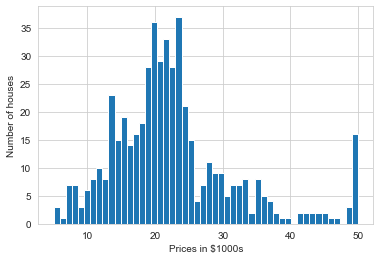

In [4]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

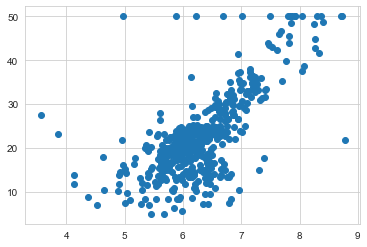

In [5]:
plt.scatter(boston.data[:,5],boston.target,label=True)

plt.xlabel=('Number of rooms')
plt.ylabel=('Price in $1000s')

#### Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense!

In [6]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['Price'] = boston.target

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# The mathematics behind the Least Squares Method:

In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically

## Now, we're labeling each line as having a distance D, and each point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:

D21+D22+D23+D24+....+D2N

So how do we find this line? The least-square line approximating the set of points:

(X,Y)1,(X,Y)2,(X,Y)3,(X,Y)4,(X,Y)5,

has the equation:

Y=a0+a1X

this is basically just a rewritten form of the standard equation 
for a line:

Y=mx+b

We can solve for these constants a0 and a1 by simultaneously 

solving these equations:

ΣY=a0N+a1ΣX

ΣXY=a0ΣX+a1ΣX2

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

9.102108981180313 -34.67062077643857


/var/folders/xr/y1wwrpw92p70ymr6yvbdh6sm0000gp/T/ipykernel_11163/459716144.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,b = np.linalg.lstsq(X,Y)[0]


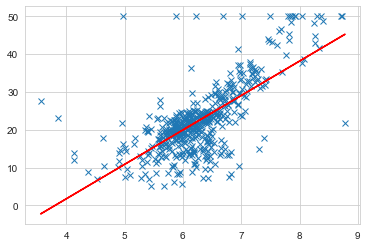

In [10]:
X = boston_df.RM

#The next line is for adding ones to the arrays of the attributes to be like: (X,1)
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

#Y= Target price of the houses
Y = boston_df.Price

#Using Numpy to creat the single variable linear refression
#Creat an array of [X 1]

#Now get out m and b values for our best fit line
#linalg = linear Algebra, lstsq=Least squares
m,b = np.linalg.lstsq(X,Y)[0]

#The[0] is because we only want the first value of that index

#b= The slope,  M= The intercept 
print(m, b)

# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'x')


# Next the best fit line
x= boston_df.RM

plt.plot(x, m*x + b,'r',label='Best Fit Line')

# Getting the error

We've just completed a single variable regression using the least squares method! We see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier.

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root.



In [11]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


/var/folders/xr/y1wwrpw92p70ymr6yvbdh6sm0000gp/T/ipykernel_11163/317391815.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

In [12]:
import sklearn
from sklearn.linear_model import LinearRegression

In [13]:
lreg = LinearRegression()

In [14]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

/var/folders/xr/y1wwrpw92p70ymr6yvbdh6sm0000gp/T/ipykernel_11163/250345768.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_multi = boston_df.drop('Price',1)


In [15]:
lreg.fit(X_multi,Y_target)

LinearRegression()

In [16]:
print("The estimated intercepts coefficient is %.2f"%lreg.intercept_)

print("The number of coefficients used was %d"%len(lreg.coef_))

The estimated intercepts coefficient is 36.46
The number of coefficients used was 13


So we have basically made an equation for a line, but instead of just one coefficient m and an intercept b, we now have 13 coefficients.

In [18]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

# Using Training and Validation


In [20]:
from sklearn.model_selection import train_test_split


In [21]:
# Grab the output and set as X and Y test and train data sets!
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [22]:
# Print shapes of the training and testing data sets
print(X_train.shape,X_test.shape,Y_test.shape,Y_train.shape)

(379, 2) (127, 2) (127,) (379,)


# Predicting Prices

In [23]:
#Creating new linear regression object
lreg = LinearRegression()

#fitting the train datasets for that object
lreg.fit(X_train,Y_train)

LinearRegression()

In [24]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [25]:
#Now we will get the mean square error

print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))


Fit a model X_train, and calculate MSE with Y_train: 40.84
Fit a model X_train, and calculate MSE with X_test and Y_test: 51.94


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

# Residual Plots
In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

Residual=Observedvalue−Predictedvalue

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.



Text(0.5, 1.0, 'Residual Plots')

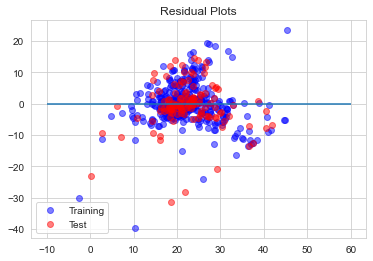

In [27]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=60)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')

Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal.

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='Price'>

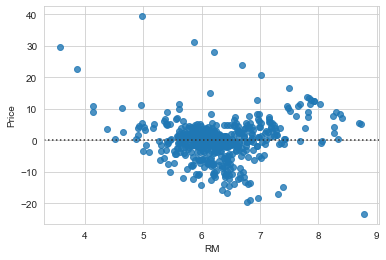

In [28]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)